# <b>Project 4 - Recommender System (Movie Recommendation System)</b>

In [2]:
import numpy as np
import pandas as pd

## #Data Exploration & Visualization

In [3]:
movies = pd.read_csv('movies.csv')
credits = pd.read_csv('movies_credit.csv') 

In [4]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


##### Describing the movie dataset
- budget = provides budget of the movie
- genres = describes genres of the movie
- homepage = provides homepage link of the movie
- id = TMDB id of the movie
- keywords = has movie description keywords
- original_language = language of the movie
- original_title = title of the movie
- overview = gives an overview of the movie in description
- popularity = describes popularity of the movie in number format
- production_company = describes which production company is behind the movie
- production_countries = movie shoot in which country
- release_date = release date of the movie
- revenue = revenue generated by the movie
- runtime = total duration of the movie
- spoken_languages = list of languages spoken in the movie
- status = status of the movie (released or not)
- tagline = tagline of the movie
- title = title in english of the movie
- vote_average = average vote for the movie
- vote_count = total vote count for the movie   

##### Now looking at the shape of the <u> movies dataset</u>
- represents that there are total 4803 movies in the dataset

In [5]:
movies.shape

(4803, 20)

##### Looking at the Credits dataset and understanding it
- title = title of the movie
- cast = complete list of the cast in the movie
- crew = complete list of the crew in the movie

In [6]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
credits.head(1)['cast'].values

array(['[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "ge

In [8]:
credits.head(1)['crew'].values

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

##### Merging both movies and movies_credit dataset into one based on the title of the movie

In [9]:
movies = movies.merge(credits,on='title')
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

<Axes: >

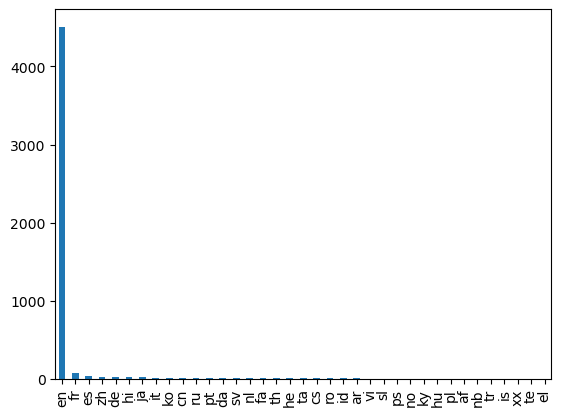

In [11]:
movies['original_language'].value_counts().plot(kind='bar')
# This shows that the most of the movies (95%) are in english language and the data is imbalanced in terms of language. 
# Hence, it is not good approach to hold on to this language feature.

<Axes: >

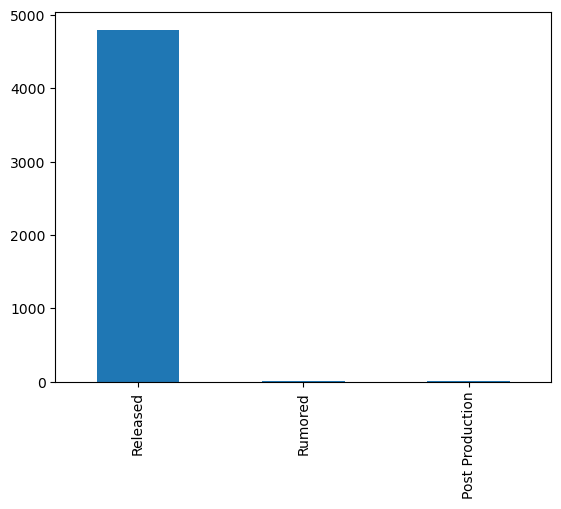

In [12]:
movies['status'].value_counts().plot(kind='bar')

##### The list of columns (features) important for my recommender systems
+ genres = genres are important because several movies can be recommended based on genres
+ keywords = keywords are important because it describes main points of the movie
+ title = keeping "title" and removing the "original_title" column because original_title is in local language and "title" is in english. Hence,
keeping generic is better
+ overview = it is imp because it helps to compare the similarity of the movies - content based recommendation
+ cast = because movies are generally recommended based on the actors
+ crew = based on directors


##### The list of columns (features) not important for my recommender system

- budget = Generally, people do not recommend movies based on the movie budget. As I making a close to human-like recommendation system based on contents, I prefer not to include budget feature in the dataset
- homepage = Homepage column provides link to the movies official website which is not important for the system for recommendation
- id = id of the movie is TMDB website's movie id and is not important for me in this approach. 
- original_language = This shows that the most of the movies (95%) are in english language and the data is imbalanced in terms of language. Hence, it is not good approach to hold on to this language feature. 
- original_title = this feature is having title of the movie in local language which is not generic 
- popularity = I am making a content based recommendation system. Hence, the popularity score does not play major role in the system
- production_companies and production_countries= From a human recommendation point of view, while recommending a movie it is not generally recommended based on the production companies and countries
- runtime = it does not matter how long the movie is for the content based recommendation system

In [13]:
movies = movies[['title','overview','genres','keywords','cast','crew']]
# This is the final data on which I will work and create a content based recommendation system

In [14]:
movies.head()

,title,overview,genres,keywords,cast,crew
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4809 non-null   object
 1   overview  4806 non-null   object
 2   genres    4809 non-null   object
 3   keywords  4809 non-null   object
 4   cast      4809 non-null   object
 5   crew      4809 non-null   object
dtypes: object(6)
memory usage: 263.0+ KB


## #Data Processing

In [16]:
# Looking at the null valued data
movies.isnull().sum()

title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [17]:
# As there are only 3 rows in the dataset which are having overview data as null, so dropping it from the dataset
movies.dropna(inplace=True)
movies.isnull().sum()

title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [18]:
# Looking if there is any duplicated data or not
movies.duplicated().sum()

0

##### Working on the Final Dataset
- As I making a content based recommendation system, I will need to create tags (words) and create system. 
- For that, I will require 2 columns (Title - title of the movie to uniquely identify movies) & (Tags - Combining the columns "Overview, Genres, Keywords, Cast, Crew")
- However, for combining I will need to work on each individual columns and extract only the specific information I need for my system. Here, I will get only top-3 cast members (actors) and from the crew I will extract only the (director) details

##### - Working on the Genres column

In [19]:
movies['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

- As the above data is in the form of dictionary and I only require the name of the genres like ['Action', 'Adventure', 'Fantasy', 'Science Fiction']. 
- Hence, converting 'Genres' columns into the required form by creating a custom function.

In [20]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [21]:
# The datatype of Genres column is String of list and to avoid error while converting it into list, we need to use 
# (ast modules literal_eval function)
import ast
def convert(text): # Here the text is in string format
    L = []
    for i in ast.literal_eval(text): # Here implementing the conversion from string to list and looping on it
        L.append(i['name']) 
    return L 

In [22]:
movies['genres'] = movies['genres'].apply(convert) #Applying the custom function on the Genre column 
movies.head()

,title,overview,genres,keywords,cast,crew
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### - Working on the 'Keywords' Column 

- Applying the same custom function created above to this column as well to get the keywords

In [23]:
movies['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [24]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,title,overview,genres,keywords,cast,crew
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### - Working on the "Cast" column

- Initially, coverting the column using the above created custom fucntion 'convert()' and then keeping only the top-3 cast names.

In [25]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [26]:
# Applying the 'convert()' function to the 'cast' column
movies['cast'] = movies['cast'].apply(convert)
print(movies['cast'][0])
movies.head()

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang', 'Michelle Rodriguez', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy', 'Peter Dillon', 'Kevin Dorman', 'Kelson Henderson', 'David Van Horn', 'Jacob Tomuri', 'Michael Blain-Rozgay', 'Jon Curry', 'Luke Hawker', 'Woody Schultz', 'Peter Mensah', 'Sonia Yee', 'Jahnel Curfman', 'Ilram Choi', 'Kyla Warren', 'Lisa Roumain', 'Debra Wilson', 'Chris Mala', 'Taylor Kibby', 'Jodie Landau', 'Julie Lamm', 'Cullen B. Madden', 'Joseph Brady Madden', 'Frankie Torres', 'Austin Wilson', 'Sara Wilson', 'Tamica Washington-Miller', 'Lucy Briant', 'Nathan Meister', 'Gerry Blair', 'Matthew Chamberlain', 'Paul Yates', 'Wray Wilson', 'James Gaylyn', 'Melvin Leno Clark III', 'Carvon Futrell', 'Brandon Jelkes', 'Micah Moch', 'Hanniyah Muhammad', 'Christopher Nolen', 'Ch

,title,overview,genres,keywords,cast,crew
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [27]:
# Keeping only the top-3 cast names in the cast column
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])
print(movies['cast'][0])
movies.head()

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']


,title,overview,genres,keywords,cast,crew
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### - Working on "Crew" column

- Crating a custom function which will extract only the director information of the movie from this column and store it

In [28]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [29]:
def get_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L 

In [30]:
# Applying the custom fucntion created to get the director name
movies['crew'] = movies['crew'].apply(get_director)

In [31]:
print(movies['crew'][0])
movies.head()

['James Cameron']


,title,overview,genres,keywords,cast,crew
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [32]:
movies['crew'].value_counts()

[]                    30
[Steven Spielberg]    27
[Woody Allen]         21
[Martin Scorsese]     20
[Clint Eastwood]      20
                      ..
[Peter Care]           1
[Paolo Sorrentino]     1
[Jon Poll]             1
[Antonia Bird]         1
[Brian Herzlinger]     1
Name: crew, Length: 2347, dtype: int64

#### Transformation 

- It is required to remove the space between words because, there can be same first name and without performing this transformation different movie might be recommended
- Hence, creating a custom function to remove the spaces between the words and applying it on (genres, keywords, cast, crew) columns

In [33]:
def remove_space(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [34]:
movies['cast'] = movies['cast'].apply(remove_space)
movies['crew'] = movies['crew'].apply(remove_space)
movies['genres'] = movies['genres'].apply(remove_space)
movies['keywords'] = movies['keywords'].apply(remove_space)

In [35]:
movies.head()

,title,overview,genres,keywords,cast,crew
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


- Now the "Overview" column is in the string format and I need to get the words from it and make it into list format inorder to concatenate with the rest of the list data columns as part of our tags column work

In [36]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies.head()

,title,overview,genres,keywords,cast,crew
0,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [37]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
movies.head()

,title,overview,genres,keywords,cast,crew,tags
0,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [38]:
final_data = movies.drop(columns=['overview','genres','keywords','cast','crew'])
final_data.head()

,title,tags
0,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


- Converting the tags column with list data into string format (lower case)

In [39]:
final_data['tags'] = final_data['tags'].apply(lambda x: " ".join(x).lower())
final_data.head()

,title,tags
0,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,Spectre,a cryptic message from bond’s past sends him o...
3,The Dark Knight Rises,following the death of district attorney harve...
4,John Carter,"john carter is a war-weary, former military ca..."


### <b>#Cleaning Data:</b>                                      
1 Tokenizing the  text

2 Removing Stop Words

3 Performing Lemmatization on final text    

- <b>Tokenization:</b> Tokenization is the process of breaking a text into individual words or tokens. In this step, the text is split into its constituent words, which makes it easier to analyze and process. For example, the sentence "I love coding" would be tokenized into three tokens: "I," "love," and "coding."

- <b> StopWords: </b> Stopwords are common words that are typically removed from text during natural language processing to improve text analysis and reduce noise in the data.Examples of common stopwords in English include "the," "and," "in," "is," "of," "it," "to," and many others. Removing stopwords from text helps reduce the dimensionality of the data and focuses the analysis on more meaningful words

- <b>Lemmatization:</b> Lemmatization is the process of reducing words to their base or root form. This step is essential for text analysis because it reduces different forms of a word to a common base form. For example, the words "running" and "ran" would both be lemmatized to "run." This simplifies the text and ensures that similar words are treated as the same, which is crucial for accurate analysis and modeling.

In [40]:
# Process the tags column
import re
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
import string
from sklearn.feature_extraction.text import TfidfVectorizer


def process_tags(txt):   # sourcery skip: avoid-builtin-shadow, list-comprehension
    cleanText = re.sub('\s+', ' ', txt) # Replace multiple spaces with a single space
    cleanText = cleanText.strip() # Removing leading and trailing whitespaces
    
    #------------Tokenizing Cleaned Text--------------------------------------------------------
    # Tokenizing our cleaned text
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(cleanText)
    #--------------------------------------------------------------------------------------------

    #-------------Removing Stop Words------------------------------------------------------------
    stopwords = nltk.corpus.stopwords.words('english')
    words_new = []
    for word in tokens:
        if word not in stopwords:
            words_new.append(word)
    #--------------------------------------------------------------------------------------------
    #-----------Performing Lemmatization---------------------------------------------------------
    wn = WordNetLemmatizer() 
    lemm_text = [wn.lemmatize(word) for word in words_new]
    #--------------------------------------------------------------------------------------------
    #----------Converting List into String-------------------------------------------------------
    processed_text = ' '.join(lemm_text)
    
    return processed_text


final_data['processed_tags'] = final_data['tags'].apply(lambda x: process_tags(x))
final_data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,title,tags,processed_tags
0,Avatar,"in the 22nd century, a paraplegic marine is di...",22nd century paraplegic marine dispatched moon...
1,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha...",captain barbossa long believed dead come back ...
2,Spectre,a cryptic message from bond’s past sends him o...,cryptic message bond past sends trail uncover ...
3,The Dark Knight Rises,following the death of district attorney harve...,following death district attorney harvey dent ...
4,John Carter,"john carter is a war-weary, former military ca...",john carter war weary former military captain ...


### <b>#Generating WordCloud from the cleaned text</b>

In [41]:
!pip install wordcloud
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go

# Join the cleaned text into a single string
text = ' '.join(final_data['processed_tags'])

# Create a word cloud
wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=600,
                      max_words=600,
                      colormap='viridis'
                      ).generate(text)

# Convert word cloud to an image
wordcloud_image = wordcloud.to_image()

# Display the word cloud using Plotly as an image
fig = px.imshow(wordcloud_image)
fig.update_layout(
    title='Word Cloud of processed tags',
    xaxis_showticklabels=False,
    yaxis_showticklabels=False,
    plot_bgcolor='white'
)
fig.show()

#### Vectorization using TFidfVectorizer

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(final_data['processed_tags'])
vectors  = tfidf.transform(final_data['processed_tags']).toarray()
# Needed to convert into numpy array because if not done it will give us sparse matrix 

- Shape of the vectors

In [43]:
print(vectors.shape)
print(vectors[0])

(4806, 33007)
[0. 0. 0. ... 0. 0. 0.]


In [44]:
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- Gives the total number of frequent words in the corpus

In [45]:
len(tfidf.get_feature_names_out())

33007

- Gives the list of most frequent words to less frequent words in the corpus

In [46]:
print(tfidf.get_feature_names_out())

['00' '000' '007' ... '卧底肥妈' '绝地奶霸' '超级妈妈']


- Looking for most frequent word at certain indexes out of 33007 words

In [47]:
print(tfidf.get_feature_names_out()[2500])
print(tfidf.get_feature_names_out()[3000])
print(tfidf.get_feature_names_out()[3500])
print(tfidf.get_feature_names_out()[4500])
print(tfidf.get_feature_names_out()[5500])
print(tfidf.get_feature_names_out()[6500])
print(tfidf.get_feature_names_out()[30000])

band
bennettmiller
boarder
camilamárdila
christinahart
cook
tiger


# Similarity Score (Cosine similarity method)
- For recommending the similar movies we need to identify the nearest vectors of a particular movie vector.
- In order to find out the nearest vectors, we use similarity score and it has two methods (1- Euclidean distance method) & (2- Cosine similarity method)
- Here, I will be using cosine similarity method rather than euclidean distance method because euclidean distance does not perform well on higher dimensions
- The similarity is inverse of distance. [0-1]
- If 1 then similarity is high and if 0 then similarity is low

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)
# This will create result with values as distance/similarity between each vectors
print(similarity)

[[1.         0.0147266  0.01969455 ... 0.01365786 0.00357524 0.        ]
 [0.0147266  1.         0.00885309 ... 0.01533575 0.         0.        ]
 [0.01969455 0.00885309 1.         ... 0.01511865 0.         0.        ]
 ...
 [0.01365786 0.01533575 0.01511865 ... 1.         0.01681954 0.01879535]
 [0.00357524 0.         0.         ... 0.01681954 1.         0.00968533]
 [0.         0.         0.         ... 0.01879535 0.00968533 1.        ]]


In [49]:
similarity.shape
# It finds out distance of each movie with every movie, and that is the reason why the shape of the similarity shape is (4806,4806)

(4806, 4806)

In [50]:
similarity[0]
# Gives similarity score of first movie with every movie, it can also be seen that the first value is 1 which indicates that the value is the
# similarity score of first movie with itself.

array([1.        , 0.0147266 , 0.01969455, ..., 0.01365786, 0.00357524,
       0.        ])

In [51]:
similarity[1]

array([0.0147266 , 1.        , 0.00885309, ..., 0.01533575, 0.        ,
       0.        ])

In [52]:
final_data[final_data['title'] == 'The Lego Movie'].index[0]

744

### Creating function which will recommend top 10 similar movies based on the given movie 

1) Initially, if the movie_name is given, I will need to find out the index of that movie in my dataset
2) Based on index value, I will be able to know the list of similarity scores of that particular movie with every movie
3) Using Enumerate function to align index and values together while sorting the similarity score in descending order to get top-10 movies

1) Based on given movie name getting the index of that movie in my dataset 

In [53]:
final_data[final_data['title'] == 'Batman Begins'].index[0]

119

In [54]:
final_data[final_data['title'] == 'Iron Man 3'].index[0]

31

In [55]:
final_data[final_data['title'] == 'Avengers: Age of Ultron'].index[0]

7

2) Based on the fetched index getting the similarity score list of that movie

In [56]:
print(similarity[119]) # For Batman Begins
print(similarity[31]) # For Iron Man 3
print(similarity[7]) # For Avengers: Age of Ultron

[0.01715808 0.00655821 0.01172466 ... 0.0109899  0.00409539 0.00370965]
[0.04640284 0.01938561 0.00802527 ... 0.00475767 0.         0.        ]
[0.05112835 0.0529056  0.05104122 ... 0.         0.         0.00747226]


3) Now as I need the top 10 similar movies I will need to sort the data in descending order to get top-10.
- However, there is a problem if I am sorting, the index position is getting lost. So, to solve this problem I am using enumerate function (which prints index with value)
- Applying lambda function in that to sort in descending order according to the similarity score and not based on the index value.


In [57]:
print(list(enumerate(similarity[119]))) # For Batman Begins
print(list(enumerate(similarity[31]))) # For Iron Man 3
print(list(enumerate(similarity[7]))) # For Avengers: Age of Ultron

[(0, 0.01715808162220408), (1, 0.006558213503509009), (2, 0.01172466408217976), (3, 0.2611814646176751), (4, 0.002331269650102021), (5, 0.03217639900184993), (6, 0.018121510540054356), (7, 0.041662818796935716), (8, 0.0), (9, 0.1722991739872468), (10, 0.06540338417023524), (11, 0.022476386650994017), (12, 0.012161204110578552), (13, 0.0020296887845656785), (14, 0.1277646813674383), (15, 0.00567974796160447), (16, 0.03295144348951712), (17, 0.013883095976069699), (18, 0.005436426669766377), (19, 0.011152412707820787), (20, 0.0491810661935333), (21, 0.016418282270039386), (22, 0.0), (23, 0.0), (24, 0.009110728754195004), (25, 0.0025452456338097527), (26, 0.03245470089461404), (27, 0.0018145765769929001), (28, 0.0025246079525511216), (29, 0.00554353914279938), (30, 0.045525644480412186), (31, 0.030270851484937543), (32, 0.0), (33, 0.021933780624451855), (34, 0.0), (35, 0.061931870749965694), (36, 0.002225994864235557), (37, 0.0), (38, 0.037605931628066365), (39, 0.01901298129775106), (40,

In [58]:
print(sorted(list(enumerate(similarity[119])),reverse = True, key=lambda x:x[1])) # For Batman Begins
print(sorted(list(enumerate(similarity[31])),reverse = True, key=lambda x:x[1])) # For Iron Man 3
print(sorted(list(enumerate(similarity[7])),reverse = True, key=lambda x:x[1])) # For Avengers: Age of Ultron

[(119, 0.9999999999999997), (65, 0.2918547075166775), (3, 0.2611814646176751), (1362, 0.21472109931030753), (1363, 0.20246932187689012), (428, 0.1921599235132602), (299, 0.18090201348738633), (9, 0.1722991739872468), (210, 0.1593773753745051), (14, 0.1277646813674383), (1199, 0.12639141218322122), (238, 0.12354436804040574), (3825, 0.12219477848410477), (3860, 0.11251162191201307), (813, 0.10742189890377418), (2215, 0.09520949427943866), (1748, 0.08466070590298715), (1388, 0.08437147509886253), (1726, 0.08046240876484936), (617, 0.07945719702218257), (68, 0.0791399840021656), (870, 0.0782826480280839), (3127, 0.07689375921707939), (1944, 0.0764066200333676), (163, 0.07613407206713242), (1059, 0.07000082406338654), (4602, 0.06976844620082462), (1180, 0.06974623541968744), (79, 0.06853011395975797), (700, 0.06689489372584445), (2727, 0.0666932913425366), (782, 0.06619750828716256), (1051, 0.06616618096915135), (1492, 0.06569931181187628), (10, 0.06540338417023524), (41, 0.065234401447337

- Final Custom function

In [59]:
def recommend(movie):
    index = final_data[final_data['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:11]: # Printing from 1-10 because 0th index will be the same movie
        print(final_data.iloc[i[0]].title)

recommend('Avengers: Age of Ultron')

The Avengers
Captain America: Civil War
Iron Man 2
Iron Man
Iron Man 3
Captain America: The Winter Soldier
The Wolverine
Thor
Thor: The Dark World
Fantastic Four


In [60]:
recommend('Iron Man 3')

Iron Man
Iron Man 2
Avengers: Age of Ultron
Captain America: Civil War
X-Men
The Avengers
The Incredible Hulk
Captain America: The Winter Soldier
Captain America: The First Avenger
Ant-Man


In [61]:
recommend('Batman Begins')

The Dark Knight
The Dark Knight Rises
Batman
Batman
Batman Returns
Batman Forever
Batman v Superman: Dawn of Justice
Batman & Robin
Man of Steel
The Prestige


In [62]:
recommend('Avatar')

Aliens
Battle: Los Angeles
Star Trek Into Darkness
Falcon Rising
Apollo 18
Titan A.E.
Meet Dave
Predators
Alien³
Lifeforce
